## 1.2 House Price Prediction (Gradient Descent)

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the data

In [2]:
names = ["size", "bedrooms", "price"]
data = pd.read_csv("ex1data2.txt", header = None, names = names)
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
m = len(y)
data.head(5)

size  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

### Visualize the data

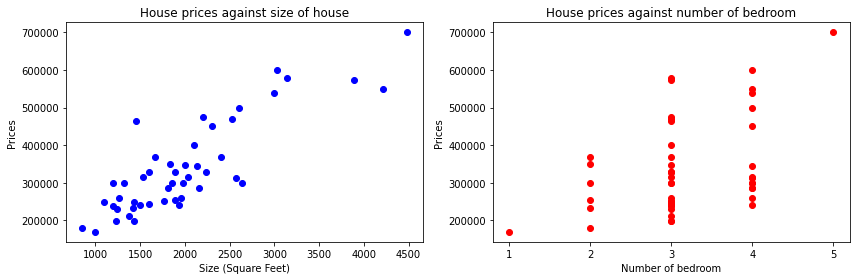

In [3]:
# create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4), nrows = 1, ncols = 2)
axes[0].scatter(data.iloc[:, 0], y, color = "b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data.iloc[:, 1], y, color = "r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1, 6, step = 1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

### Feature normalization

In [4]:
def featureNormalization(X):
    return (X - np.mean(X)) / np.std(X)

In [5]:
X = featureNormalization(X)

In [6]:
ones = np.ones((m, 1))
X = np.hstack((ones, X))
alpha = 0.01
iterations = 400
theta = np.zeros((3, 1))
y = y[:, np.newaxis]

### Cost function

In [7]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

#### Cost at initial theta

In [8]:
J = computeCostMulti(X, y, theta)
print("With theta = [0 ; 0 ; 0]\nCost computed = %f" % J)
print("Expected cost value (approx) 65591548106.45744\n\n")

With theta = [0 ; 0 ; 0]
Cost computed = 65591548106.457443
Expected cost value (approx) 65591548106.45744




### Gradient descent

In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    J_history = []
    for i in range(iterations):
        grad = X.T @ ((X @ theta) - y)
        theta = theta - (alpha/m) * grad
        J_history.append(computeCostMulti(X, y, theta))
    return [theta, J_history]

#### Final values of theta

In [10]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent:");
print(" %f\n %f\n %f"% (theta[0][0], theta[1][0], theta[2][0]));
print("Expected theta values (approx)");
print(" 334302.06399328\n 99411.44947359\n 3267.01285407")

Theta found by gradient descent:
 334302.063993
 99411.449474
 3267.012854
Expected theta values (approx)
 334302.06399328
 99411.44947359
 3267.01285407


### Plot J_history

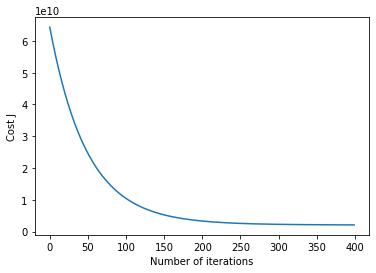

In [11]:
plt.plot([i for i in range(iterations)], J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.show()

### Prediction for a value

In [12]:
# predict the price of a  1650 sq-ft, 3 br house
x_sample = np.vstack(([[1]], featureNormalization([[1650], [3]])))
price = theta.T @ x_sample
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n %f\n"% price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 430446.500613



## 1.2 House Price Prediction (Normal Equation)

### Normal Equation

In [13]:
def normalEqn(X, y):
    temp1 = np.linalg.inv(np.dot(X.T, X))
    temp2 = np.dot(temp1, X.T)
    return np.dot(temp2, y)

#### Theta from normal equation

In [14]:
theta_normal = normalEqn(X, y)
print("Theta found by normal equations:");
print(" %f\n %f\n %f\n" % (theta_normal[0][0], theta_normal[1][0], theta_normal[2][0]));

Theta found by normal equations:
 340412.659574
 109447.796470
 -6578.354854



### Prediction for a value

In [15]:
# predict the price of a  1650 sq-ft, 3 br house
price = theta_normal.T @ x_sample
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n %f\n"% price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 456438.810898

